Question 1: Use yfinance to Extract Stock Data

In [2]:
import yfinance as yf
import pandas as pd

In [3]:
tesla_data = yf.download('TSLA', period='max')

[*********************100%***********************]  1 of 1 completed


In [4]:
tesla_data.reset_index(inplace=True)
tesla_data.to_csv('tesla_stock_data.csv', index=False)

In [5]:
# Display the first five rows
print(tesla_data.head(5))

                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

   Adj Close     Volume  
0   1.592667  281494500  
1   1.588667  257806500  
2   1.464000  123282000  
3   1.280000   77097000  
4   1.074000  103003500  


 Question 2: Use Webscraping to Extract Tesla Revenue Data

In [11]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

try:
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')

        revenue_table = soup.find('table', class_='historical_data_table')

        if revenue_table:
            rows = revenue_table.find_all('tr')
            data = []
            headers = []
            
            for th in rows[0].find_all('th'):
                headers.append(th.text.strip())

            for row in rows[1:]:
                data_row = []
                for td in row.find_all('td'):
                    data_row.append(td.text.strip())
                data.append(data_row)

            tesla_revenue = pd.DataFrame(data, columns=headers)

            print(tesla_revenue.tail())
            
        else:
            print("Error: Revenue table not found.")
    
    else:
        print(f"Failed to retrieve webpage. Status code: {response.status_code}")

except requests.exceptions.RequestException as e:
    print(f"Error during request: {e}")

Failed to retrieve webpage. Status code: 403


Question 3: Use yfinance to Extract Stock Data

In [12]:
import yfinance as yf
import pandas as pd

gme_data = yf.download('GME', period='max')

gme_data.reset_index(inplace=True)

# Save the dataframe if needed
# gme_data.to_csv('gme_stock_data.csv', index=False)

print(gme_data.head())


[*********************100%***********************]  1 of 1 completed
                       Date     Open     High      Low    Close  Adj Close  \
0 2002-02-13 00:00:00-05:00  2.40625  2.51500  2.38125  2.51250   1.691667   
1 2002-02-14 00:00:00-05:00  2.54375  2.54875  2.48125  2.50000   1.683251   
2 2002-02-15 00:00:00-05:00  2.50000  2.50625  2.46250  2.48750   1.674834   
3 2002-02-19 00:00:00-05:00  2.47500  2.47500  2.34375  2.38750   1.607504   
4 2002-02-20 00:00:00-05:00  2.40000  2.46875  2.38125  2.46875   1.662210   

     Volume  
0  76216000  
1  11021600  
2   8389600  
3   7410400  
4   6892800  


Question 4: Use Webscraping to Extract GME Revenue Data

In [14]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

url = 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

try:
    response = requests.get(url)
    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        revenue_table = soup.find('table', class_='revenue_table')
        if revenue_table:
            rows = revenue_table.find_all('tr')
            data = []
            headers = []

            for th in rows[0].find_all('th'):
                headers.append(th.text.strip())

            for row in rows[1:]:
                data_row = []
                for td in row.find_all('td'):
                    data_row.append(td.text.strip())
                data.append(data_row)

            gme_revenue = pd.DataFrame(data, columns=headers)
            print(gme_revenue.tail())
            
        else:
            print("Error: Revenue table not found.")
    
    else:
        print(f"Failed to retrieve webpage. Status code: {response.status_code}")

except requests.exceptions.RequestException as e:
    print(f"Error during request: {e}")


Failed to retrieve webpage. Status code: 403


Question 5: Plot Tesla Stock Graph

[*********************100%***********************]  1 of 1 completed


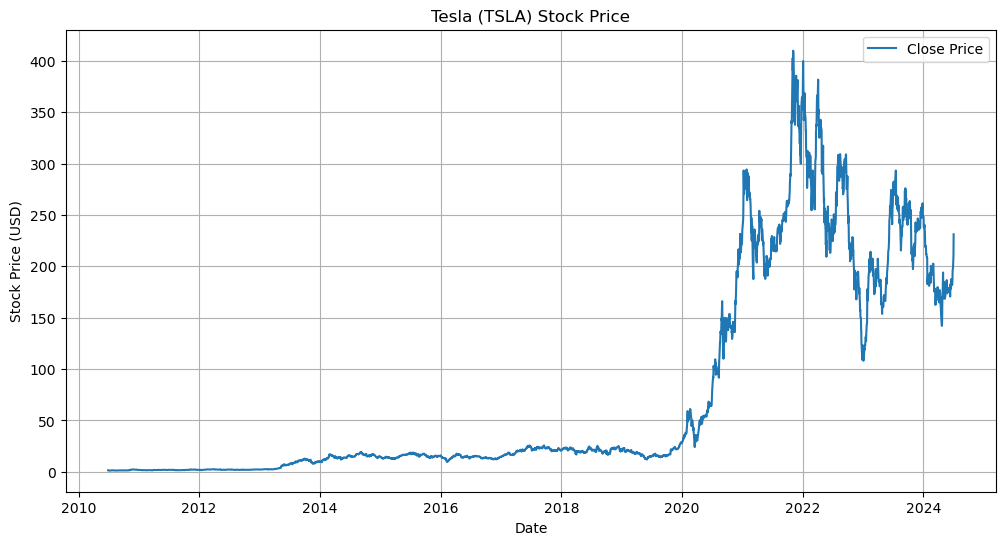

In [15]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(stock_data):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price')
    plt.title('Tesla (TSLA) Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

tesla_data = yf.download('TSLA', period='max')

make_graph(tesla_data)

Question 6: Plot GameStop Stock Graph

[*********************100%***********************]  1 of 1 completed


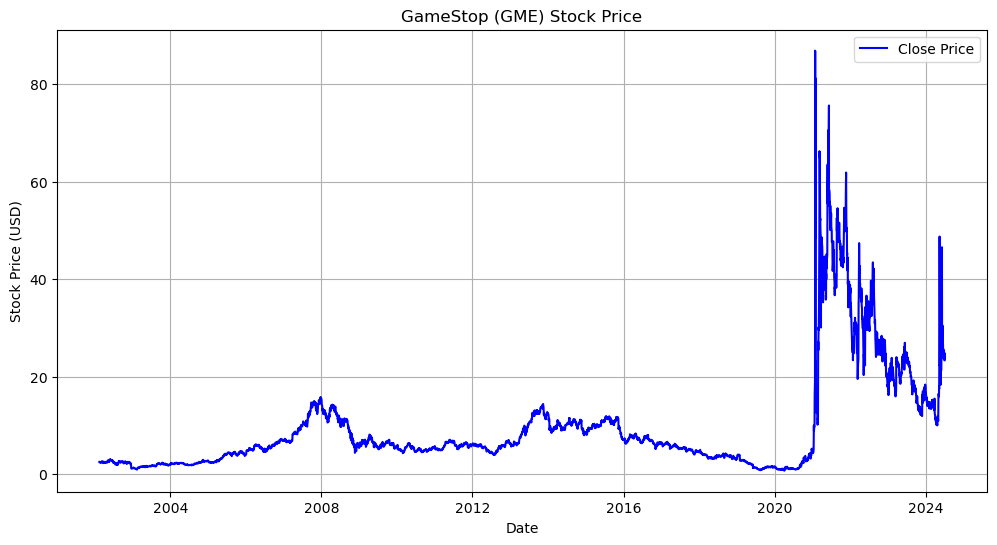

In [16]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(stock_data):
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Close Price', color='b')
    plt.title('GameStop (GME) Stock Price')
    plt.xlabel('Date')
    plt.ylabel('Stock Price (USD)')
    plt.legend()
    plt.grid(True)
    plt.show()

gme_data = yf.download('GME', period='max')
make_graph(gme_data)